In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [3]:
df = pd.read_csv("KOTRA.csv")

In [4]:
df.describe()

,COUNTRYCD,TRADE_COUNTRYCD,TRADE_HSCD,TARIFF_AVG,SP_POP_TOTL,PA_NUS_FCRF,IC_BUS_EASE_DFRN_DB,TRADE_HSCD_COUNTRYCD,CPI,ContainerPortTraffic,...,Economic_Growth_Rate,X17ExportChangeRate_FullQuarter,X17ImportChangeRate_FullQuarter,amount,weight,GDP1Y_Diff,Distance_Diff,I(TRADE_COUNTRYCD-TRADE_HSCD),HSCDPercent,Inflation+Unemp_Rate
count,14472.000000,14472.000000,14472.000000,14472.000000,14472.000000,14472.000000,14472.000000,14472.000000,14472.000000,14472.000000,...,14472.000000,14472.000000,14472.000000,14472.000000,14472.000000,14472.000000,14472.000000,14472.000000,14472.000000,14472.000000
mean,479.733969,25.855599,22.432548,1.911318,17.833640,3.213234,68.823243,17.435799,138.810458,15.710124,...,3.229816,0.207798,0.210205,12.668139,9.709845,-0.063129,0.001133,33.623124,0.083642,10.246508
std,262.159362,1.213519,1.272114,0.503901,1.410826,2.803765,11.216043,1.951657,42.825170,1.360948,...,2.560991,0.263601,0.229600,3.121130,3.434206,0.086513,0.763751,52.204272,0.335249,7.623819
min,12.000000,23.634415,19.311380,0.095310,15.215730,0.264938,42.671390,8.156223,98.266850,11.545509,...,-5.000000,-0.173421,-0.043534,0.693147,0.053541,-0.204216,-2.229211,-32.862209,0.000013,2.790000
25%,320.000000,24.901600,21.647940,1.791759,17.018330,1.433032,59.823730,16.158955,114.943600,14.979940,...,1.680000,-0.164753,-0.015904,10.788058,7.470360,-0.094559,-0.396907,5.274317,0.008364,6.000000
50%,484.000000,26.084560,22.314990,1.791759,17.858570,2.122015,69.378820,17.436829,125.416342,15.894330,...,3.000000,0.286654,0.226288,12.768951,9.675535,-0.075508,0.300059,19.290395,0.022269,8.200000
75%,704.000000,26.763520,23.211360,1.791759,18.642040,4.191495,78.020700,18.696415,147.087900,16.367270,...,5.070000,0.510695,0.337392,14.801983,12.038873,-0.041891,0.558685,41.365808,0.058719,9.700000
max,842.000000,28.510650,26.572591,6.246107,21.049973,10.411130,87.166330,25.450650,333.673322,19.218890,...,7.000000,0.601180,0.608122,24.056130,22.695629,0.341303,1.509294,240.975600,10.782907,35.540000


In [5]:
df.shape

(14472, 22)

In [6]:
plt.rcParams["figure.figsize"] = (20,20)

<AxesSubplot:>

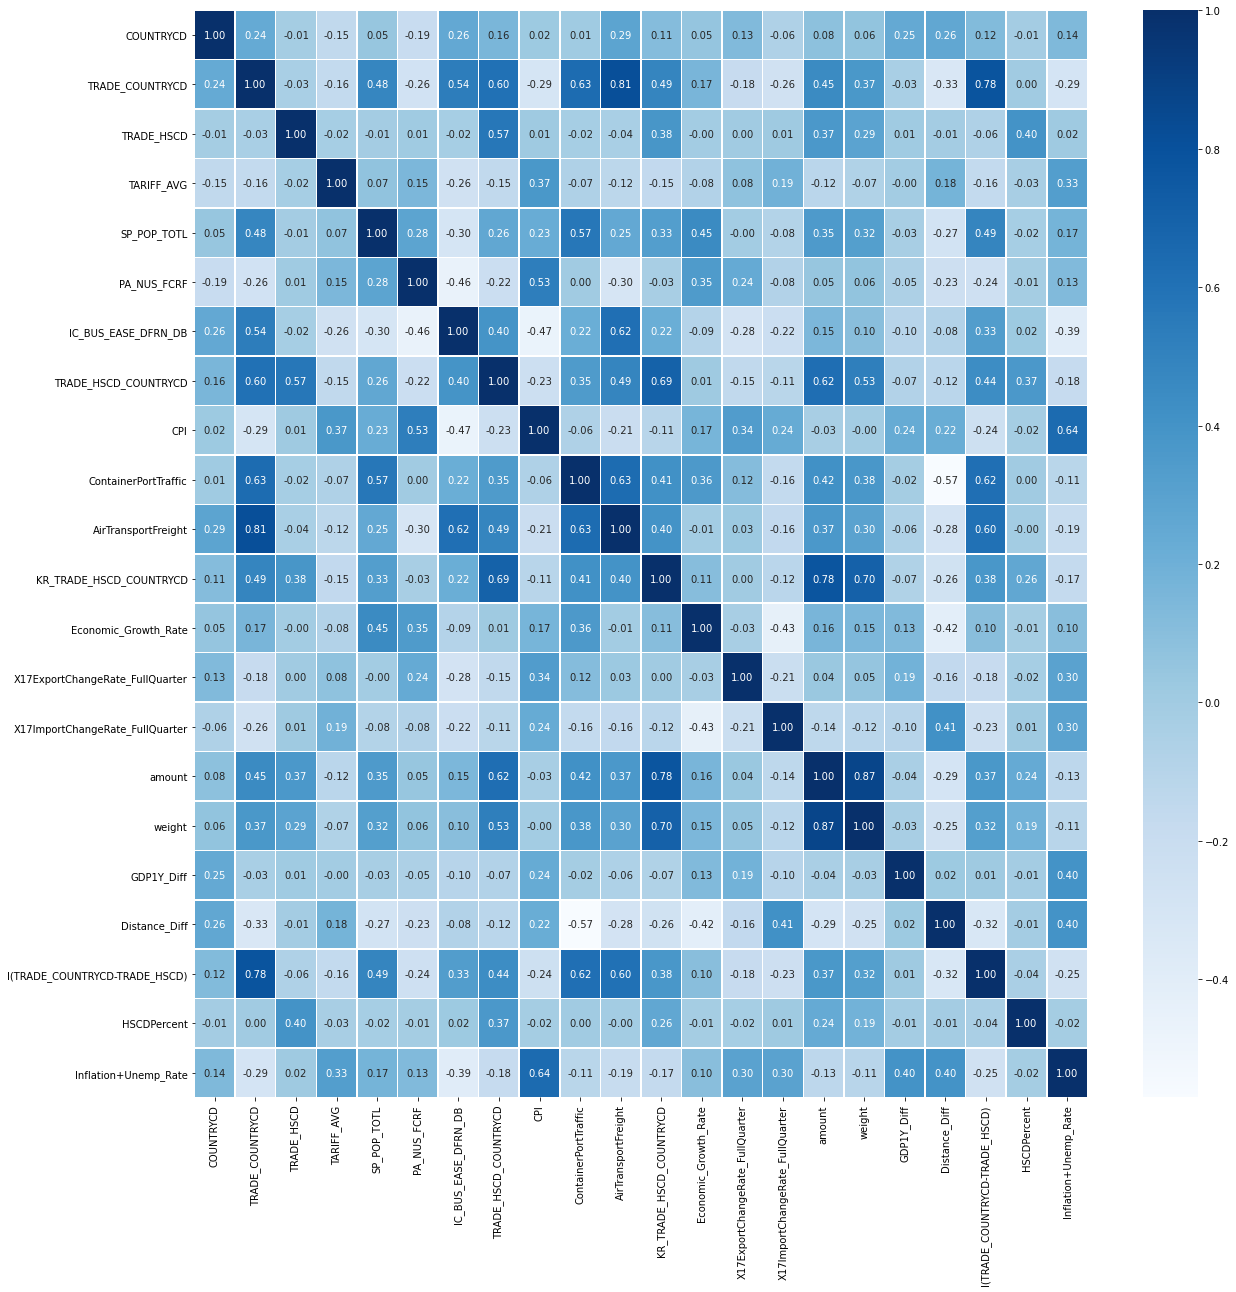

In [7]:
sns.heatmap(data = df.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')

In [8]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [9]:
X_features = df.drop("KR_TRADE_HSCD_COUNTRYCD",axis=1,inplace=False)
y_target= df["KR_TRADE_HSCD_COUNTRYCD"]

In [10]:
import statsmodels.api as sm
X = sm.add_constant(X_features)
model = sm.OLS(y_target, X)
result = model.fit()
print( result.summary() )

                               OLS Regression Results                              
Dep. Variable:     KR_TRADE_HSCD_COUNTRYCD   R-squared:                       0.692
Model:                                 OLS   Adj. R-squared:                  0.692
Method:                      Least Squares   F-statistic:                     1547.
Date:                     Tue, 20 Jul 2021   Prob (F-statistic):               0.00
Time:                             11:47:29   Log-Likelihood:                -27147.
No. Observations:                    14472   AIC:                         5.434e+04
Df Residuals:                        14450   BIC:                         5.450e+04
Df Model:                               21                                         
Covariance Type:                 nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X_features,y_target,test_size=0.3,random_state=156)

In [12]:
def rmse(y,pred):
    return np.sqrt(mean_squared_error(y,pred))

In [13]:
def MAPE(y,pred):
    return np.mean(np.abs((y-pred)/y)*100)    

In [14]:
def evaluate_regr(y,pred):
    rmse_val = rmse(y,pred)
    mae_val = mean_absolute_error(y,pred)
    mape_val = np.mean(np.abs((y-pred)/y)*100)
    print("RMSE:{0:3f},MAE:{1:3F},MAPE:{2:3F}".format(rmse_val,mae_val,mape_val))

### 일반 회귀

In [15]:
lr_reg = LinearRegression()
lr_reg.fit(X_train,y_train)
score_train = lr_reg.score(X_train, y_train) 
score_train

0.691959886655886

In [16]:
lr_reg = LinearRegression()
lr_reg.fit(X_train,y_train)
pred = lr_reg.predict(X_test)

evaluate_regr(y_test,pred)

RMSE:1.540807,MAE:1.103911,MAPE:10.766858


LinearRegression_Coefficients


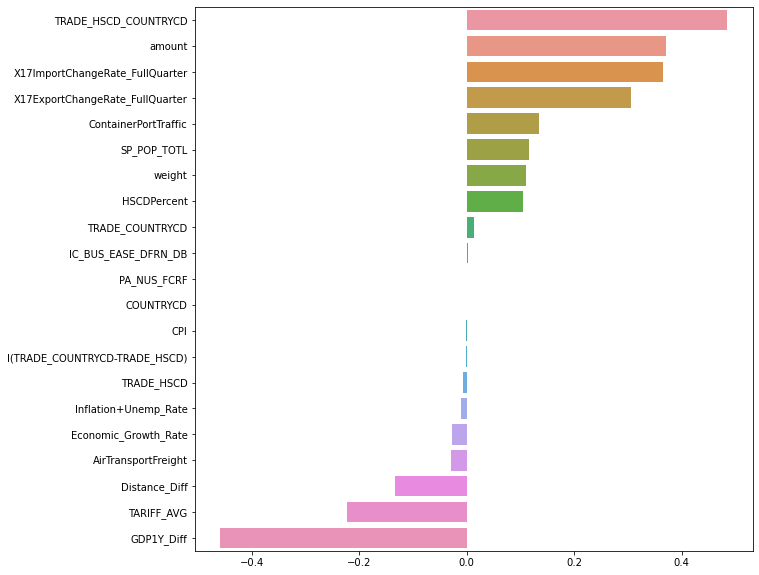

In [17]:
plt.rcParams["figure.figsize"] = (10,10)
coef = pd.Series(lr_reg.coef_,index=X_features.columns)
coef_sort = coef.sort_values(ascending=False)
sns.barplot(x=coef_sort.values,y=coef_sort.index)
print("LinearRegression_Coefficients")

### Ridge 

In [18]:
Ridge_reg = Ridge(alpha=0.1)
Ridge_reg.fit(X_train,y_train)
score_train = Ridge_reg.score(X_train, y_train) 
score_train

0.6919598860445912

In [19]:
Ridge_reg = Ridge(alpha=0.1)
Ridge_reg.fit(X_train,y_train)
pred = Ridge_reg.predict(X_test)

evaluate_regr(y_test,pred)

RMSE:1.540808,MAE:1.103912,MAPE:10.766874


### Lasso

In [20]:
Lasso_reg = Lasso(alpha=0.01)
Lasso_reg.fit(X_train,y_train)
score_train = Lasso_reg.score(X_train, y_train) 
score_train

0.6910569648743229

In [21]:
Lasso_reg = Lasso(alpha=0.01)
Lasso_reg.fit(X_train,y_train)
pred = Lasso_reg.predict(X_test)

evaluate_regr(y_test,pred)

RMSE:1.542840,MAE:1.105730,MAPE:10.787313


### Elastic Net

In [22]:
from sklearn.linear_model import ElasticNet

elastic_net = Lasso(alpha=0.01)
elastic_net.fit(X_train,y_train)
score_train = elastic_net.score(X_train, y_train) 
score_train

0.6910569648743229

In [23]:
elastic_net = ElasticNet(alpha=0.01, l1_ratio=0.5, random_state=42)
elastic_net.fit(X_train,y_train)
pred = elastic_net.predict(X_test)

evaluate_regr(y_test,pred)

RMSE:1.542416,MAE:1.105390,MAPE:10.782511


In [24]:
def get_top_bottom_coef(model,n=10):
    coef=pd.Series(model.coef_,index=X_features.columns)
    coef_high = coef.sort_values(ascending=False).head(n)
    coef_low = coef.sort_values(ascending=False).tail(n)
    return coef_high,coef_low

In [25]:
def visualize_coefficient(models):
    fig,axs=plt.subplots(figsize=(24,10),nrows=1,ncols=3)
    fig.tight_layout()
    
    for i_num,model in enumerate(models):
        coef_high,coef_low = get_top_bottom_coef(model)
        coef_concat = pd.concat([coef_high,coef_low])
        axs[i_num].set_title(model.__class__.__name__+"Coefficients",size=25)
        axs[i_num].tick_params(axis="y",direction="in",pad=-120)
        for label in (axs[i_num].get_xticklabels()+axs[i_num].get_yticklabels()):
            label.set_fontsize(22)
        sns.barplot(x=coef_concat.values,y=coef_concat.index,ax=axs[i_num])

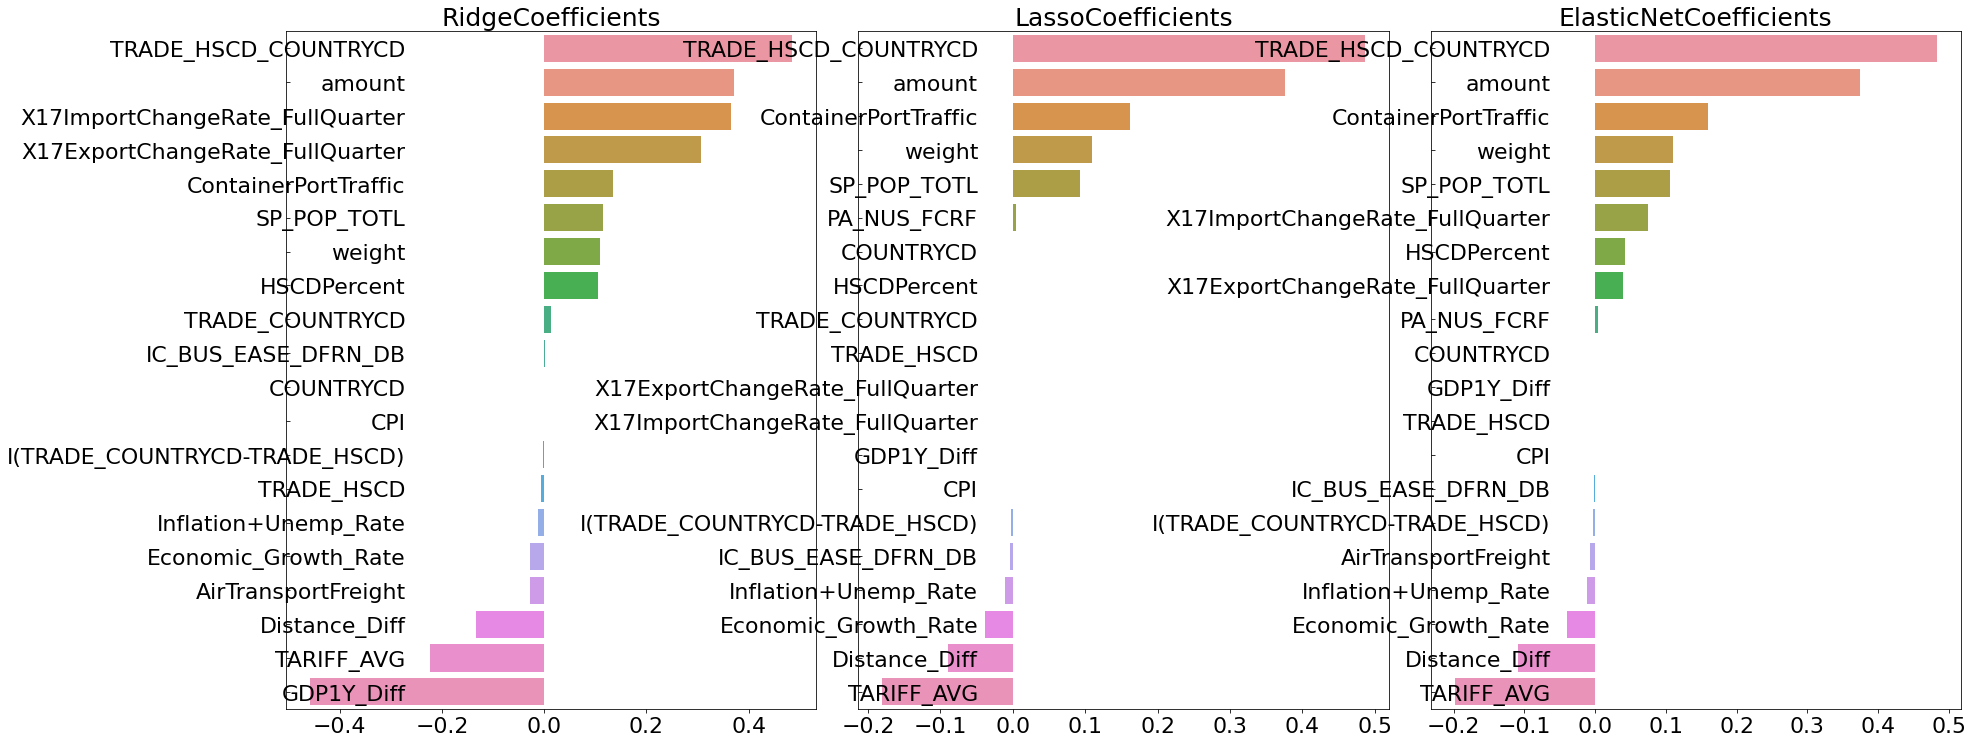

In [26]:
models = [Ridge_reg,Lasso_reg,elastic_net]
visualize_coefficient(models)

### Decision Tree

In [27]:
from sklearn.tree import DecisionTreeRegressor

df_reg = DecisionTreeRegressor(random_state=0,max_depth=7)
df_reg.fit(X_train,y_train)
score_train = df_reg.score(X_train, y_train) 
score_train

0.747033921802067

In [28]:
df_reg = DecisionTreeRegressor(random_state=0,max_depth=7)
df_reg.fit(X_train,y_train)
pred = df_reg.predict(X_test)

evaluate_regr(y_test,pred)

RMSE:1.539995,MAE:1.094746,MAPE:10.670511


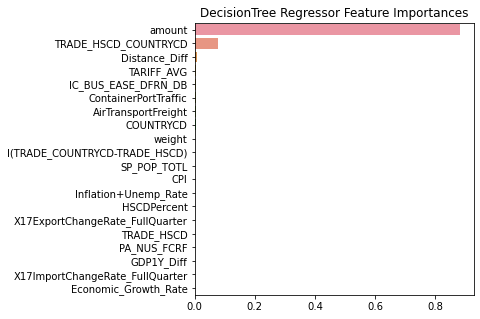

In [29]:
df_importances_values = df_reg.feature_importances_
df_importances = pd.Series(df_importances_values,index=X_features.columns)
df_top20 = df_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(5,5))
plt.title('DecisionTree Regressor Feature Importances')
sns.barplot(x=df_top20,y=df_top20.index)
plt.show()

### RF,GBM,XGBoost,LightGBM 회귀 & 종합비교 

In [30]:
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [31]:
def get_model_predict(model,X_train,X_test,y_train,y_test):
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    print('###',model.__class__.__name__,'###')
    evaluate_regr(y_test,pred)

In [32]:
lr_reg = LinearRegression()
Ridge_reg = Ridge(alpha=0.1)
Lasso_reg = Lasso(alpha=0.01)
elastic_net = ElasticNet(alpha=0.01, l1_ratio=0.5, random_state=42)
df_reg = DecisionTreeRegressor(random_state=0,max_depth=7)
rf_reg = RandomForestRegressor(random_state=0,n_estimators=1000,max_depth=7)
gbm_reg = GradientBoostingRegressor(random_state=0,n_estimators=1000)
xgb_reg = XGBRegressor(random_state=0,n_estimators=1000)
lgbm_reg = LGBMRegressor(random_state=0,n_estimators=1000)

In [33]:
for model in [lr_reg,Ridge_reg,Lasso_reg,elastic_net,df_reg,rf_reg,gbm_reg,xgb_reg,lgbm_reg]:
    get_model_predict(model,X_train.values,X_test.values,y_train.values,y_test.values)

### LinearRegression ###
RMSE:1.540807,MAE:1.103911,MAPE:10.766858
### Ridge ###
RMSE:1.540808,MAE:1.103912,MAPE:10.766874
### Lasso ###
RMSE:1.542840,MAE:1.105730,MAPE:10.787313
### ElasticNet ###
RMSE:1.542416,MAE:1.105390,MAPE:10.782511
### DecisionTreeRegressor ###
RMSE:1.539995,MAE:1.094746,MAPE:10.670511
### RandomForestRegressor ###
RMSE:1.456284,MAE:1.027735,MAPE:10.139563
### GradientBoostingRegressor ###
RMSE:1.466567,MAE:1.034811,MAPE:10.171202
### XGBRegressor ###
RMSE:1.519223,MAE:1.096397,MAPE:10.540217
### LGBMRegressor ###
RMSE:1.498082,MAE:1.075701,MAPE:10.423138


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

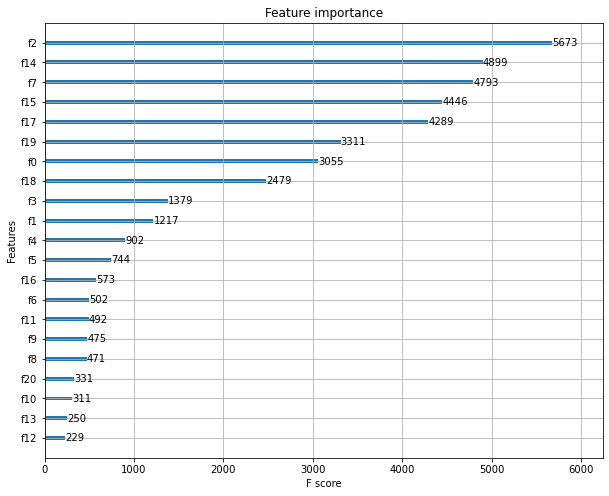

In [34]:
from xgboost import plot_importance
fig,ax = plt.subplots(1,1,figsize=(10,8))
plot_importance(xgb_reg,ax=ax)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

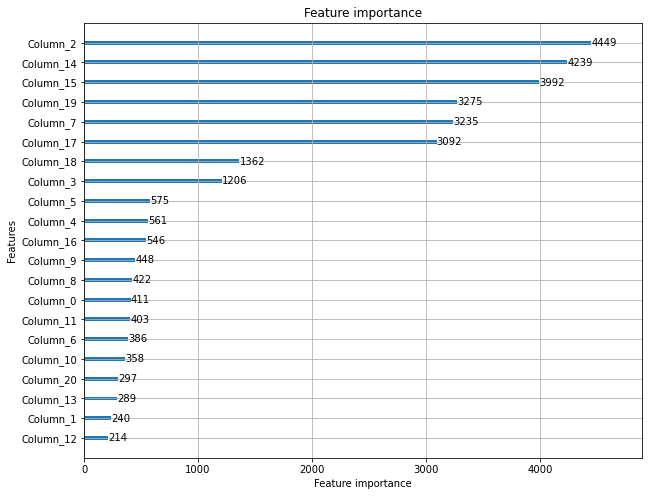

In [35]:
from lightgbm import plot_importance
fig,ax = plt.subplots(figsize=(10,8))
plot_importance(lgbm_reg,ax=ax)

In [36]:
gbm_reg = GradientBoostingRegressor(random_state=0,n_estimators=1000)
gbm_reg.fit(X_train,y_train)
score_train =gbm_reg.score(X_train, y_train) 
score_train

0.8605313027549352

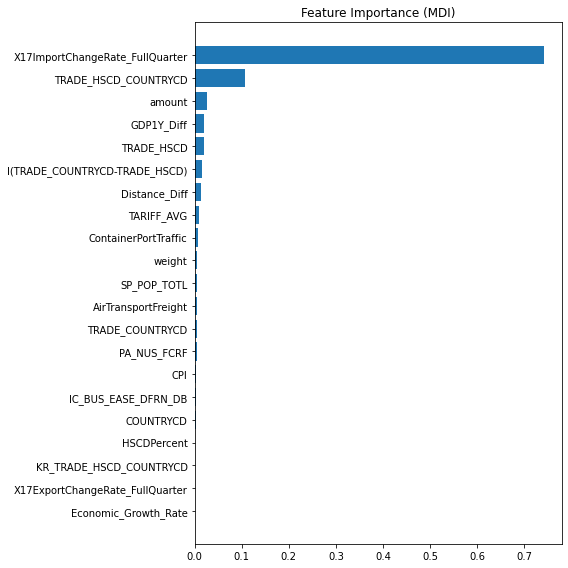

In [37]:
from sklearn.inspection import permutation_importance

feature_importance = gbm_reg.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(8, 8))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(df. columns)[sorted_idx])
plt.title('Feature Importance (MDI)')
result = permutation_importance(gbm_reg, X_test, y_test, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()
fig.tight_layout()
plt.show()

In [38]:
gbm_reg_params = {'n_estimators': 1000,
          'max_depth': 7,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}

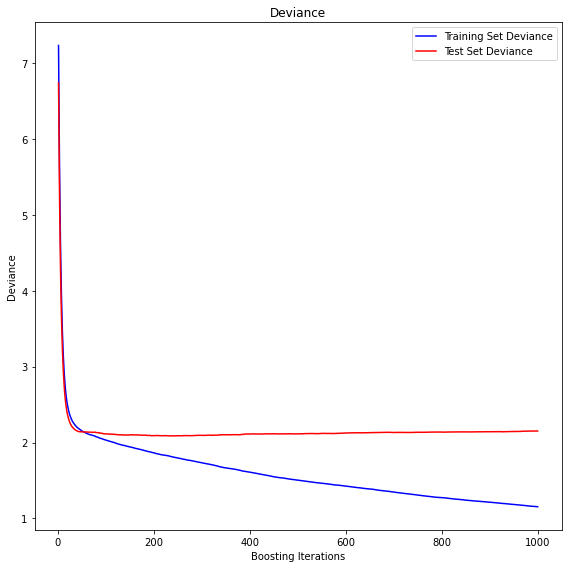

In [39]:
test_score = np.zeros((gbm_reg_params['n_estimators'],), dtype=np.float64)
for i, y_pred in enumerate(gbm_reg.staged_predict(X_test)):
    test_score[i] = gbm_reg.loss_(y_test, y_pred)
 
fig = plt.figure(figsize=(8, 8))
plt.subplot(1, 1, 1)
plt.title('Deviance')
plt.plot(np.arange(gbm_reg_params['n_estimators']) + 1, gbm_reg.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(gbm_reg_params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
fig.tight_layout()
plt.show()

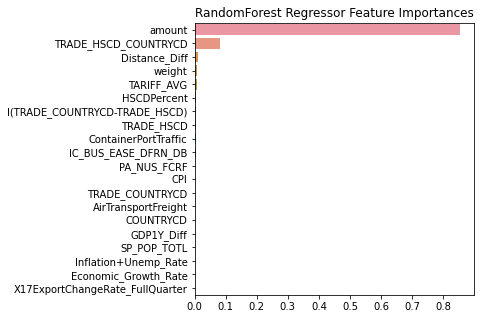

In [40]:
plt.rcParams["figure.figsize"] = (15,15)
rf_importances_values = rf_reg.feature_importances_
rf_importances = pd.Series(rf_importances_values,index=X_features.columns)
rf_top20 = rf_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(5,5))
plt.title('RandomForest Regressor Feature Importances')
sns.barplot(x=rf_top20,y=rf_top20.index)
plt.show()

In [41]:
import shap
explainer = shap.TreeExplainer(rf_reg)
shap_values = explainer.shap_values(X_test)

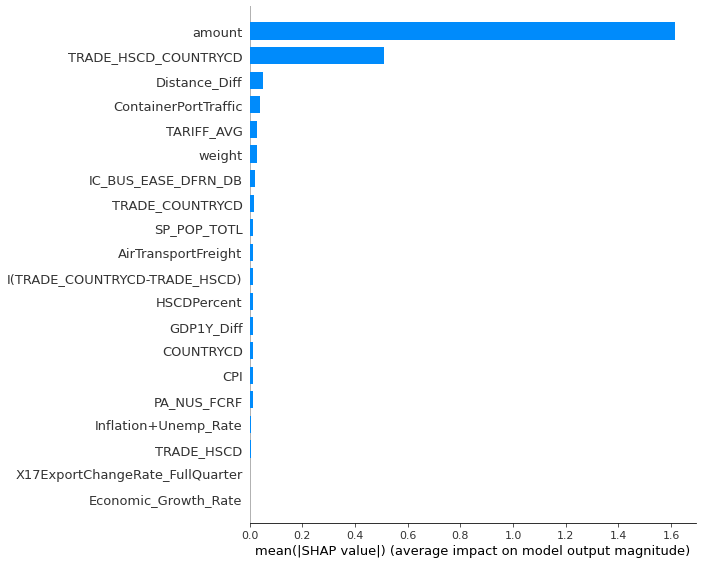

In [42]:
shap.summary_plot(shap_values, X_test, plot_type = "bar")

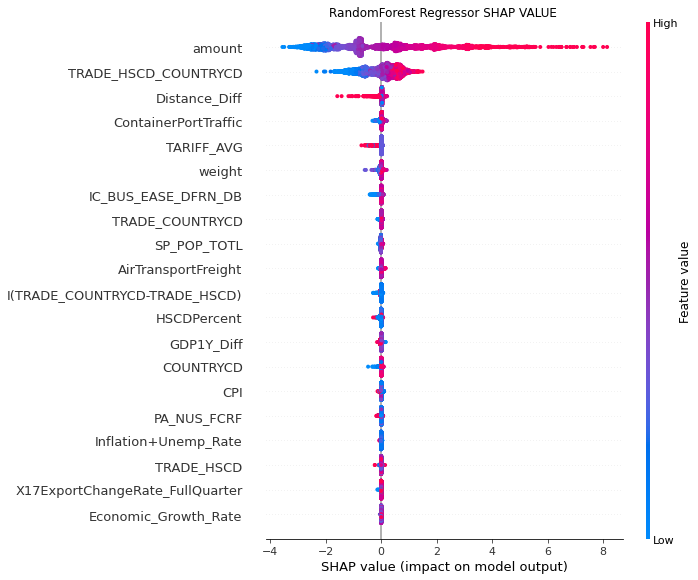

In [43]:
plt.rcParams["figure.figsize"] = (10,10)
plt.title('RandomForest Regressor SHAP VALUE ')
shap.summary_plot(shap_values, X_test)

In [44]:
pred1 = rf_reg.predict(X_test)
evaluate_regr(y_test,pred1)

RMSE:1.456284,MAE:1.027735,MAPE:10.139563


In [45]:
rf_Y_TestSet = pd.DataFrame(y_test)
rf_Y_TestSet.head(20)

,KR_TRADE_HSCD_COUNTRYCD
8716,12.442480
3664,13.016940
10400,14.213950
12108,18.303500
9642,11.597750
13578,15.414690
5543,10.858190
471,15.275864
12412,11.888370
4683,3.912023


In [46]:
rf_Pred_Values = pd.DataFrame(pred1)
rf_Pred_Values.head(20)

,0
0,11.093119
1,13.015239
2,13.158025
3,17.711102
4,9.553993
5,14.464213
6,10.204931
7,14.741011
8,11.841702
9,7.968980


In [47]:
rf_Y_TestSet.to_csv('실제값.csv', sep=',')

In [48]:
rf_Pred_Values.to_csv('예측값.csv', sep=',')